## 小数据训练

In [1]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset

In [2]:
small_train_dataset, small_val_dataset,_ = ImageDataset.from_folders('/home/featurize/data/small_train_val')
big_train_dataset, big_val_dataset,_ = ImageDataset.from_folders('/home/featurize/data/big_train_val')


In [3]:
small_train_dataset.classes

['冻害',
 '叶斑病',
 '叶烧',
 '斜纹夜蛾',
 '根腐病',
 '灰霉病',
 '畸形果',
 '病毒病',
 '白粉病',
 '白粉虱',
 '着色不良',
 '红蜘蛛',
 '缺素症',
 '褐斑病',
 '革腐病']

## 小数据集训练

In [5]:
model_list

('adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_x

In [3]:
model_list = ImagePredictor.list_models()

model = ag.Categorical(
    'vit_large_patch32_384',
    'seresnet50',
)

In [8]:
model1 = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
model1.fit(small_train_dataset,small_val_dataset, hyperparameters={'epochs':100 ,'model': model})  # you can trust the default config, we reduce the 
# epoch to save some build time
fit_result = model1.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))


ImagePredictor sets accuracy as default eval_metric for classification problems.
`time_limit=auto` set to `time_limit=7200`.
Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.misc.seed       42 != 173
root.misc.num_workers 4 != 6
root.train.epochs    200 != 100
root.train.early_stop_baseline 0.0 != -inf
root.train.batch_size 32 != 16
root.train.early_stop_patience -1 != 10
root.train.early_stop_max_value 1.0 != inf
root.img_cls.model   resnet101 != vit_large_patch32_384
}
Saved config to /home/featurize/work/AutoGloun/2022-4-12/e2eda18e/.trial_0/config.yaml
Model vit_large_patch32_384 created, param count:                                         305623055
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start t

Top-1 train acc: 0.990, val acc: 0.779


In [7]:
#画混淆矩阵
import os,glob,random, csv,itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib

#参数 y_true为测试数据集的真实标签，y_pred为网络对测试数据集的预测结果
def plot_confusion_matrix(y_true, y_pred, root,title = "AutoGluon Confusion matrix",
                          cmap = plt.cm.Blues, save_flg = False):
    classes = [str(i) for i in range(15)]#参数i的取值范围根据你自己数据集的划分类别来修改，我这儿为7代表数据集共有7类
    # classes = straw_class
    labels = range(15)#数据集的标签类别，跟上面I对应
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(14, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=40)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)
    if save_flg:
        plt.savefig(root)
    plt.show()
    

#plot_confusion_matrix(test_dataset['label'], bulk_result, save_flg = True)#调用混淆矩阵


Confusion matrix, without normalization


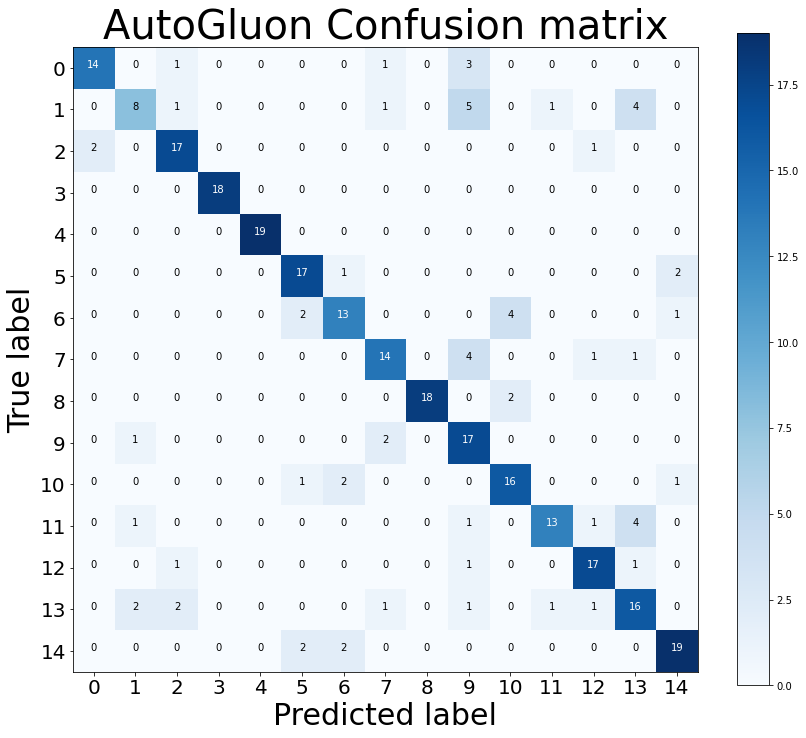

In [10]:
plot_confusion_matrix(small_val_dataset['label'], model1.predict(small_val_dataset),root='./small_model.png', save_flg = True)

In [11]:
small_val_dataset.classes

['冻害',
 '叶斑病',
 '叶烧',
 '斜纹夜蛾',
 '根腐病',
 '灰霉病',
 '畸形果',
 '病毒病',
 '白粉病',
 '白粉虱',
 '着色不良',
 '红蜘蛛',
 '缺素症',
 '褐斑病',
 '革腐病']

## 预训练

In [4]:
model2 = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
model2.fit(big_train_dataset,big_val_dataset, hyperparameters={'epochs':100 ,'model': model})  # you can trust the default config, we reduce the 
# epoch to save some build time
fit_result = model2.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))


`time_limit=auto` set to `time_limit=7200`.
Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
The number of requested GPUs is greater than the number of available GPUs.Reduce the number to 1
Starting fit without HPO
modified configs(<old> != <new>): {
root.misc.num_workers 4 != 6
root.misc.seed       42 != 141
root.train.batch_size 32 != 16
root.train.epochs    200 != 100
root.train.early_stop_max_value 1.0 != inf
root.train.early_stop_patience -1 != 10
root.train.early_stop_baseline 0.0 != -inf
root.img_cls.model   resnet101 != vit_large_patch32_384
}
Saved config to /home/featurize/work/AutoGloun/2022-4-12/4fe1b128/.trial_0/config.yaml
Model vit_large_patch32_384 created, param count:                                         305623055
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
Epoch[0] Batch [49]	Speed: 52.192346 samples/sec	accuracy=

Top-1 train acc: 0.979, val acc: 0.698


In [5]:
# model2 = ImagePredictor()
# since the original dataset does not provide validation split, the `fit` function splits it randomly with 90/10 ratio
model2.fit(small_train_dataset,small_val_dataset, hyperparameters={'epochs':100})  # you can trust the default config, we reduce the 
# epoch to save some build time
fit_result = model2.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))


`time_limit=auto` set to `time_limit=7200`.
Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Use user provided model. Neglect model in config.
AMP not enabled. Training in float32.
Start training from [Epoch 0]
Epoch[0] Batch [49]	Speed: 57.202823 samples/sec	accuracy=0.828750	lr=0.000100
[Epoch 0] training: accuracy=0.815878
[Epoch 0] speed: 59 samples/sec	time cost: 19.738410
[Epoch 0] validation: top1=0.891089 top5=0.960396
[Epoch 0] Current best top-1: 0.891089 vs previous -inf, saved to /home/featurize/work/AutoGloun/2022-4-12/4fe1b128/.trial_0/best_checkpoint.pkl
Epoch[1] Batch [49]	Speed: 62.495626 samples/sec	accuracy=0.853750	lr=0.003400
[Epoch 1] training: accuracy=0.855574
[Epoch 1] speed: 62 samples/sec	time cost: 18.575504
[Epoch 1] validation: top1=0.894389 top5=0.980198
[Epoch 1] Current best top-1: 0.894389 vs previous 0.891089, saved to /home/featurize/work/AutoGloun/2022-4-12/4fe1b128

Top-1 train acc: 0.984, val acc: 0.908


Confusion matrix, without normalization


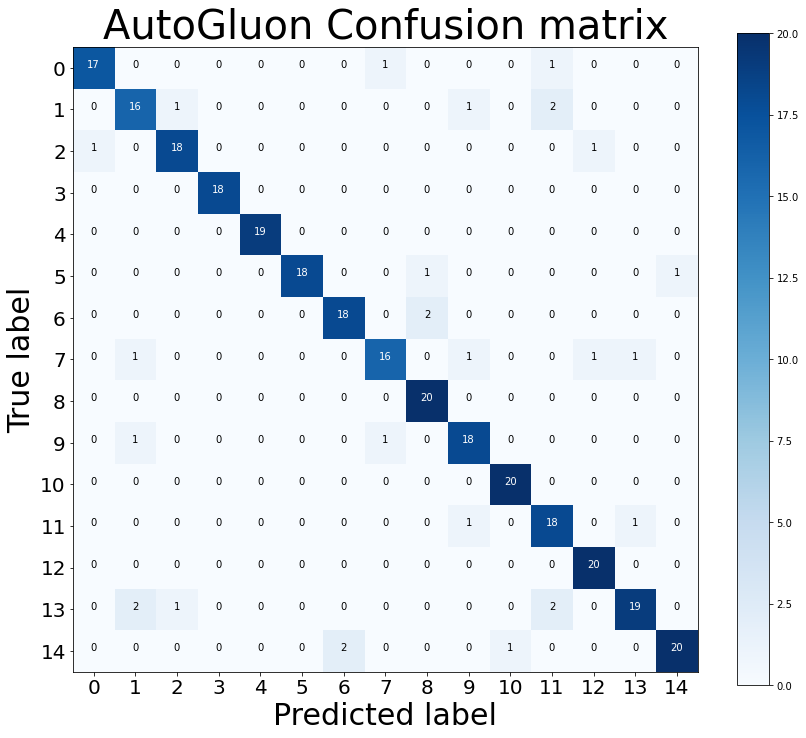

In [8]:
plot_confusion_matrix(small_val_dataset['label'], model2.predict(small_val_dataset),root='./big_model.png', save_flg = True)

In [9]:
model2.save('./VIT_15class_90%')